[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW5.ipynb)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression


**Problem 1**: In class when we used the linnerud data, we assumed that Weight was the target variable and Chins was the predictor. For this problem use Pulse as the target variable and Situps as the predictor.

Part a. Make a scatterplot of Pulse versus Situps.

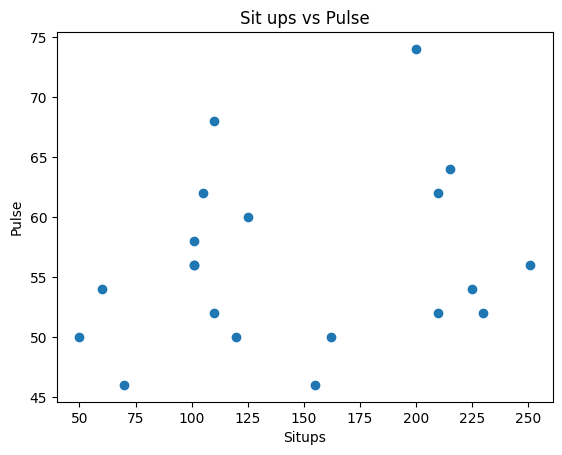

In [14]:
linnerud = load_linnerud(as_frame=True)
situps = linnerud.data['Situps']
pulses = linnerud.target['Pulse']

plt.scatter(situps, pulses)
plt.xlabel('Situps')
plt.ylabel('Pulse')
plt.title('Sit ups vs Pulse')
plt.show()



Part b. Fit a simple linear regression model to the data using Situps as a predictor and Pulse as the target.

In [15]:
situps = pd.DataFrame({"Situps":linnerud.data.Situps})

reg_prep = LinearRegression()

mod_reg = reg_prep.fit(situps,pulses)


Part c. What are the estimated slope and intercept of the model?

In [16]:
print('intercept:', mod_reg.intercept_)

print('slope:', mod_reg.coef_)

intercept: 52.32529029490991
slope: [0.02593411]


Part d. Make a new plot of the data with the regression line plotted on top of it.

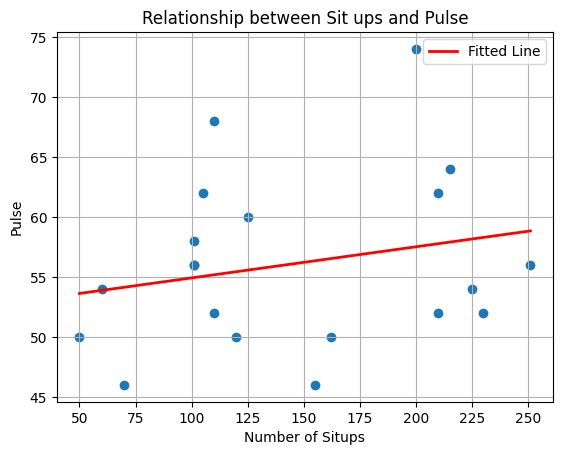

In [17]:
Beta_0 = mod_reg.intercept_
Beta_1 = mod_reg.coef_

x_axis = np.linspace(min(situps.values), max(situps.values), 400)

plt.scatter(situps, pulses)
plt.plot(x_axis, Beta_0 + Beta_1 * x_axis, label='Fitted Line', linewidth=2, color='r')
plt.title('Relationship between Sit ups and Pulse')
plt.xlabel('Number of Situps')
plt.ylabel('Pulse')
plt.legend()

plt.grid(True)
plt.show()

**Problem 2**: Consider modeling $Y$ as a function of $X$ using linear regression in two different contexts. (A) $Y$ follows a normal distribution with mean $\beta_0 + \beta_1 X$ and variance $\sigma^2$ and (B) the regression line that minimizes the target function $\sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2$.

Part a. What is the difference between the estimates for $\beta_0$ and $\beta_1$ when using maximum likelihood estimation for (A) and target function minimization for (B).

Theoretically A and B should both result in the same estimates for B(0) and B(1). They are both valid approaches. One tries to maximize likelihood and the other tries to minimize error. They should both equate to the same equation.

Part b. What is the difference in the estimate for $\sigma$ between the two methods?

MLE (A) uses a biased equation to estimate SD/Variance and Regression (B) is unbiased because it accounts for number of variables. A should have a slightly smaller estimated variance.

**Problem 3** : Use the code in the following chunk to import the car stopping data set into your python environment. This data set has two variables. The variable speed is the speed a car is going and dist is the distance the car traveled before stopping. Use speed as a predictor and dist as a target variable for the following questions.

In [33]:
%pip install pydataset
from pydataset import data
cars = data("cars")
x = cars.speed
y = cars.dist

Part a. Build a decision tree with a maximum depth of 2. Plot the tree.

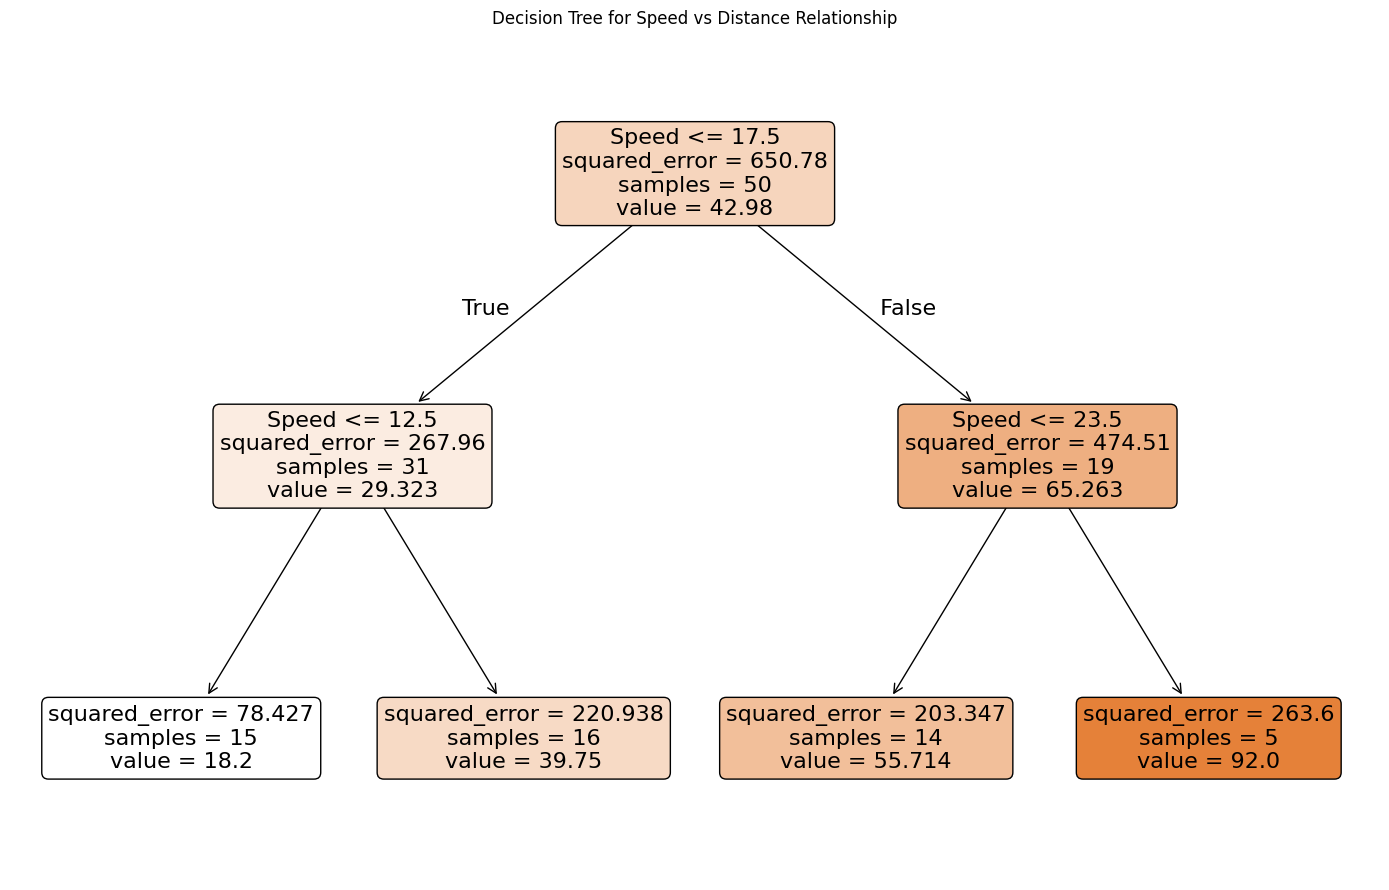

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = cars['speed']
y = cars['dist']

x_df = pd.DataFrame({"speed": X})

regressor = DecisionTreeRegressor(max_depth=2)

fitted_tree = regressor.fit(x_df, y)

plt.figure(figsize=(14, 9))
tree.plot_tree(fitted_tree, feature_names=["Speed"], fontsize=16, filled=True, rounded=True)
plt.title("Decision Tree for Speed vs Distance Relationship")
plt.tight_layout()

plt.show()

Part b. What is the split point for the first split in the decision tree?

speed <= 17.5

Part c. How many data points end up in each leaf node of the decision tree.

15, 16, 14, 5

Part. d. Using the decision tree model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

39.75 feet

**Problem 4**: Test a few other models for the car data set.

Part a. Build the decision tree with a maximum depth of 3 instead of 2. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

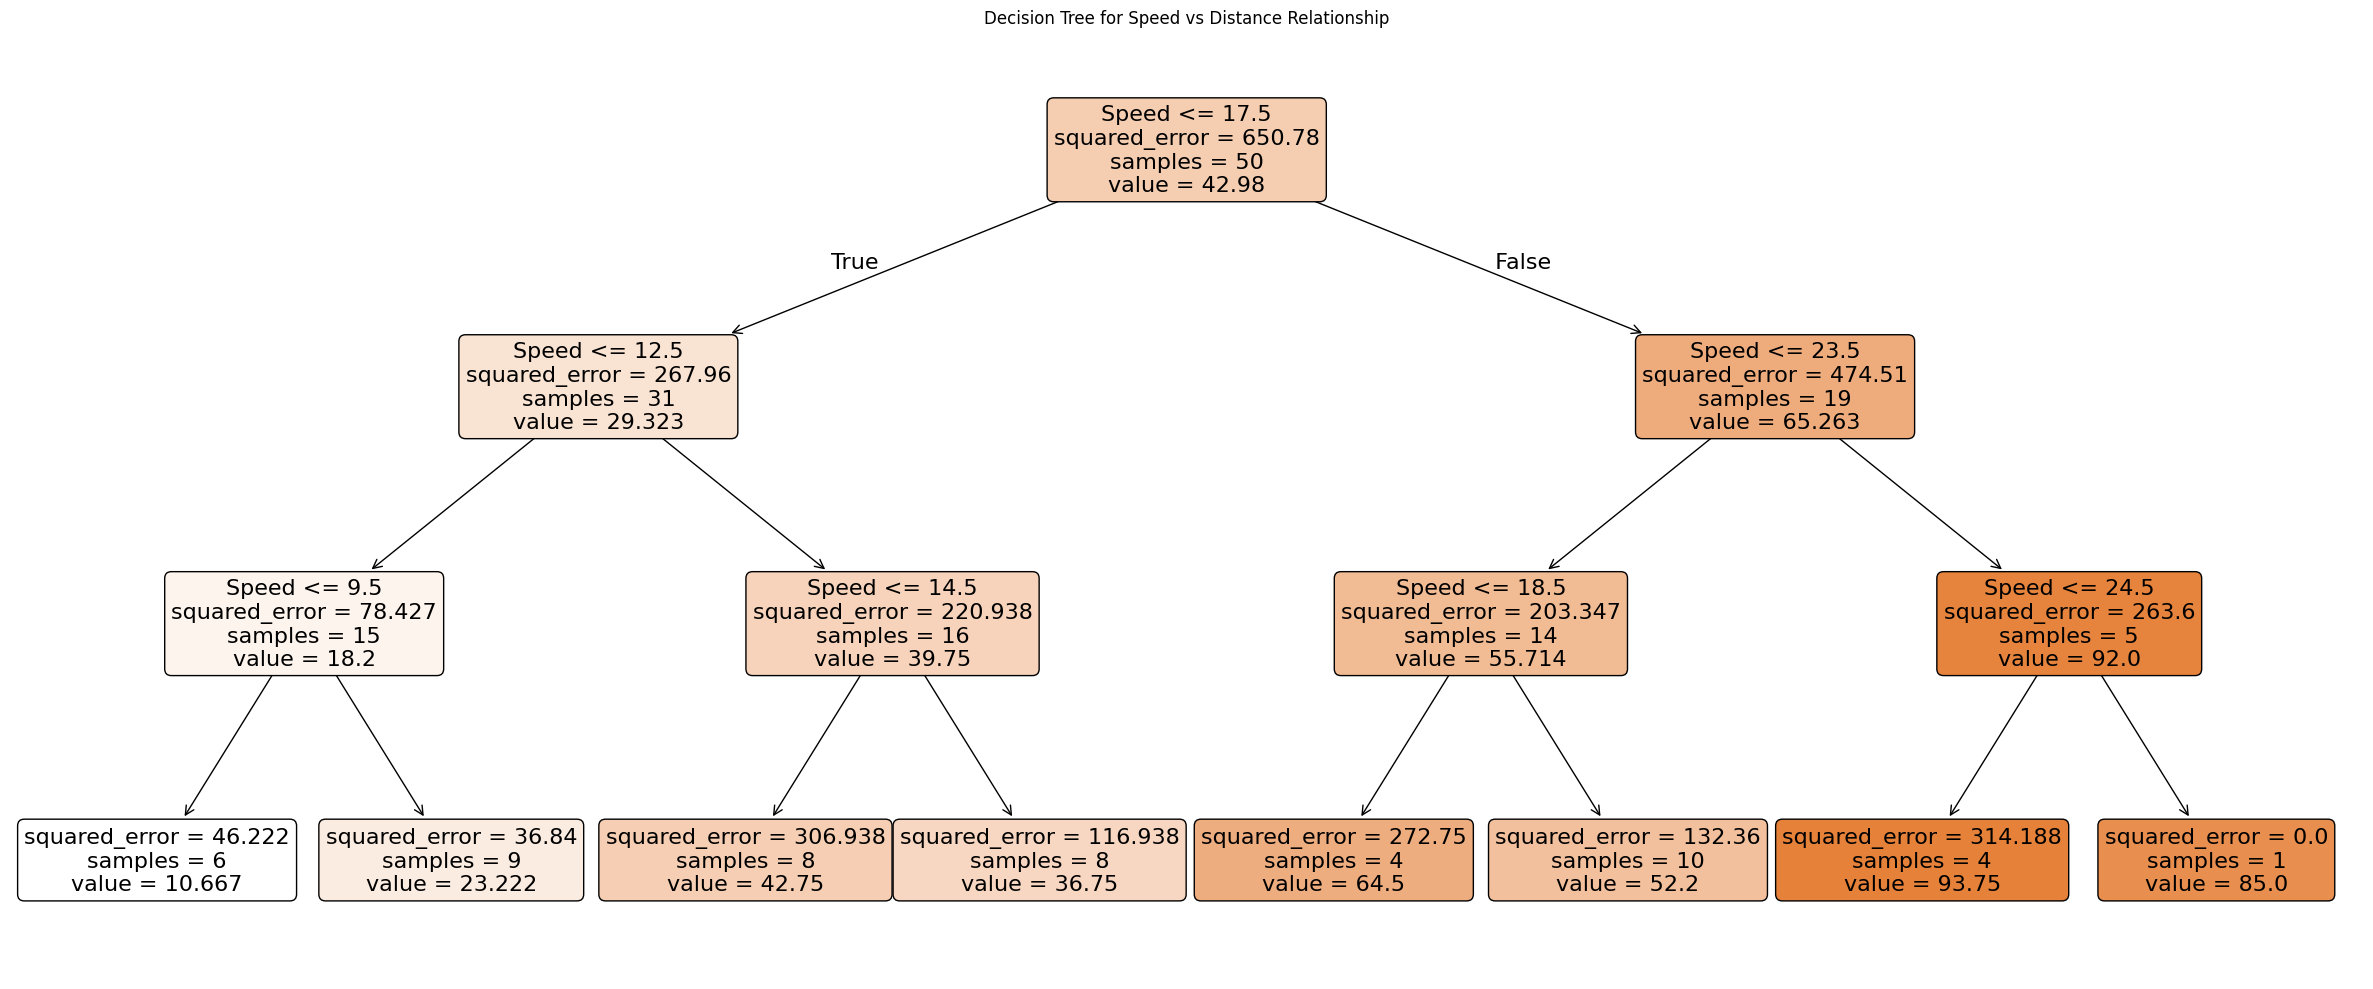

In [41]:
X = cars['speed']
y = cars['dist']

x_df = pd.DataFrame({"speed": X})

regressor = DecisionTreeRegressor(max_depth=3)

fitted_tree = regressor.fit(x_df, y)

plt.figure(figsize=(24, 10))
tree.plot_tree(fitted_tree, feature_names=["Speed"], fontsize=16, filled=True, rounded=True)
plt.title("Decision Tree for Speed vs Distance Relationship")
plt.tight_layout()

plt.show()

36.75 feet (fourth leaf node)

Part b. Fit a linear regression model to this data. For this model, what is the estimated stopping distance of a car that is traveling at a speed of 15?

In [43]:
linreg = LinearRegression()
linreg.fit(cars[['speed']], cars['dist'])


prediction_15 = linreg.predict(pd.DataFrame({"speed": [15]}))
print("Predicted stopping distance at 15:", prediction_15)

Predicted stopping distance at 15: [41.4070365]


**Problem 5**: A store with an online presence collects revenue data by month. This data can be found at [richardson.byu.edu/220/revenue_data.csv](https://richardson.byu.edu/220/revenue_data.csv). The variable MonthlyRevenue is the target variable. Money spent on ads (AdSpend), site traffic (AvgTraffic), and discount rates (DiscountRate) are the variables.

Part a. Build a linear regression model for revenue using the other variables as predictors.

In [47]:
url = "richardson.byu.edu/220/revenue_data.csv"
data = pd.read_csv("https://richardson.byu.edu/220/revenue_data.csv")

X = data[['AdSpend', 'AvgTraffic', 'DiscountRate']]

y = data['MonthlyRevenue']

linreg = LinearRegression()
linreg.fit(X, y)

print("Intercept (β0):", linreg.intercept_)
print("Coefficients (β1, β2, β3):", linreg.coef_)

Intercept (β0): 45.95203923717712
Coefficients (β1, β2, β3): [ 3.19910204  0.00390189 -0.41182189]


Part b. Interpret the coefficient for AdSpend in the context of the problem.

For every additional dollar spent on ads, estimated monthly revenue increases by $3.20 (B(1)) with average traffic and discount rate held constant.